<a href="https://colab.research.google.com/github/fkdia23/Data-Engineering-tools-for-Software-engineer/blob/master/deepLearning_backorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 1.Chargement des **données**


In [34]:
df_train = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')

##### 1.1 Afficher les cinq premières lignes de TR et de TS.


In [35]:
df_train.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [36]:
df_test.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


##### 1.2 Donnons les dimensions de TR et TS.



In [37]:
print(f'train shape: {df_train.shape}')
print(f'test shape: {df_test.shape}')

train shape: (1687861, 23)
test shape: (242076, 23)


##### 1.3 Affichons le types de variables

In [89]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

###### 1.3.1 Analyse statistique train dataset

In [39]:
df_train.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


###### 1.3.2 Analyse statistique train dataset

In [40]:
df_test.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,2.420750e+05,227351.000000,242075.000000,2.420750e+05,2.420750e+05,2.420750e+05,242075.000000,2.420750e+05,2.420750e+05,2.420750e+05,242075.000000,242075.000000,242075.000000,242075.000000,242075.000000
mean,4.997510e+02,7.923018,36.178213,1.814723e+02,3.488073e+02,5.082963e+02,51.478195,1.721393e+02,3.404254e+02,5.117754e+02,52.804693,1.824236,-7.093779,-6.632445,0.843726
std,2.928039e+04,7.041410,898.673127,5.648875e+03,1.008180e+04,1.410972e+04,1544.678350,5.164244e+03,9.386523e+03,1.397670e+04,1278.591177,178.679263,26.900636,26.160720,45.606626
min,-2.541400e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,4.000000e+00,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.630000,0.660000,0.000000
50%,1.500000e+01,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,2.000000e+00,4.000000e+00,0.000000,0.000000,0.820000,0.810000,0.000000
75%,8.100000e+01,9.000000,0.000000,4.000000e+00,1.200000e+01,2.000000e+01,4.000000,1.400000e+01,3.000000e+01,4.600000e+01,3.000000,0.000000,0.960000,0.950000,0.000000
max,1.214579e+07,52.000000,265272.000000,1.510592e+06,2.157024e+06,3.162260e+06,349620.000000,1.099852e+06,2.103389e+06,3.195211e+06,303713.000000,79964.000000,1.000000,1.000000,6232.000000


##### 1.4 Extraire les valeurs manquantes ainsi que leurs pourcentages.Interpréter les résultats

In [41]:
def missing_values_info(df):
    """
    Retourne un DataFrame contenant le nombre de valeurs manquantes et leur pourcentage par colonne.

    Parameters:
        df (pd.DataFrame): Le dataset à analyser.

    Returns:
        pd.DataFrame: Un tableau avec les colonnes contenant des valeurs manquantes triées par importance.
    """
    missing_count = df.isnull().sum()  # Nombre de valeurs manquantes
    missing_percentage = (missing_count / len(df)) * 100  # Pourcentage des valeurs manquantes

    # Créer un DataFrame avec les résultats
    missing_df = pd.DataFrame({'Valeurs Manquantes': missing_count, 'Pourcentage (%)': missing_percentage})

    # Ne garder que les colonnes ayant au moins une valeur manquante et trier par ordre décroissant
    missing_df = missing_df[missing_df['Valeurs Manquantes'] > 0].sort_values(by='Valeurs Manquantes', ascending=False)

    return missing_df


In [42]:
missing_data_traint = missing_values_info(df_train)  # Extraire les valeurs manquantes
print(missing_data_traint)

                   Valeurs Manquantes  Pourcentage (%)
lead_time                      100894         5.977625
national_inv                        1         0.000059
rev_stop                            1         0.000059
stop_auto_buy                       1         0.000059
ppap_risk                           1         0.000059
oe_constraint                       1         0.000059
deck_risk                           1         0.000059
local_bo_qty                        1         0.000059
perf_12_month_avg                   1         0.000059
perf_6_month_avg                    1         0.000059
pieces_past_due                     1         0.000059
potential_issue                     1         0.000059
min_bank                            1         0.000059
sales_9_month                       1         0.000059
sales_6_month                       1         0.000059
sales_3_month                       1         0.000059
sales_1_month                       1         0.000059
forecast_9

In [43]:
missing_data_test = missing_values_info(df_test)  # Extraire les valeurs manquantes
print(missing_data_test)

                   Valeurs Manquantes  Pourcentage (%)
lead_time                       14725         6.082800
national_inv                        1         0.000413
rev_stop                            1         0.000413
stop_auto_buy                       1         0.000413
ppap_risk                           1         0.000413
oe_constraint                       1         0.000413
deck_risk                           1         0.000413
local_bo_qty                        1         0.000413
perf_12_month_avg                   1         0.000413
perf_6_month_avg                    1         0.000413
pieces_past_due                     1         0.000413
potential_issue                     1         0.000413
min_bank                            1         0.000413
sales_9_month                       1         0.000413
sales_6_month                       1         0.000413
sales_3_month                       1         0.000413
sales_1_month                       1         0.000413
forecast_9

##### 1.5 Fonction de nettoyage des données manquantes

In [44]:
def clean_dataset(df):
    """
    Nettoie un dataset en remplissant les valeurs manquantes.

    - Remplace les valeurs manquantes des colonnes numériques par leur médiane.
    - Remplace les valeurs manquantes des colonnes catégorielles par la valeur la plus fréquente.
    - Supprime les lignes où 'lead_time' (délai de livraison) est manquant.

    Parameters:
        df (pd.DataFrame): Le dataframe à nettoyer.

    Returns:
        pd.DataFrame: Le dataframe nettoyé.
    """

    # Supprimer les lignes où 'lead_time' (délai de livraison) est manquant
    df = df.dropna(subset=['lead_time'])

    # Remplir les valeurs manquantes des colonnes numériques par la médiane
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

    # Remplir les valeurs manquantes des colonnes catégorielles par la valeur la plus fréquente (mode)
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    return df



In [45]:
df_clean_train = clean_dataset(df_train)

In [46]:
df_clean_test = clean_dataset(df_test)

In [47]:
print(f'clean train shape: {df_clean_train.shape}')
print(f'clean test shape: {df_clean_test.shape}')

clean train shape: (1586967, 23)
clean test shape: (227351, 23)


In [48]:
for i in df_clean_test.columns:
    print(f'{i}: {df_clean_test[i].isnull().sum()}')

sku: 0
national_inv: 0
lead_time: 0
in_transit_qty: 0
forecast_3_month: 0
forecast_6_month: 0
forecast_9_month: 0
sales_1_month: 0
sales_3_month: 0
sales_6_month: 0
sales_9_month: 0
min_bank: 0
potential_issue: 0
pieces_past_due: 0
perf_6_month_avg: 0
perf_12_month_avg: 0
local_bo_qty: 0
deck_risk: 0
oe_constraint: 0
ppap_risk: 0
stop_auto_buy: 0
rev_stop: 0
went_on_backorder: 0


#### 2.Sélection des variables pertinentes:

In [49]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


##### 2.1 Calcul de la corrélation

In [50]:
def correlation_analysis(df, threshold=0.9):
    """
    Analyse la corrélation des variables numériques et catégorielles, puis élimine les variables fortement corrélées.
    Affiche une heatmap de la matrice de corrélation des variables numériques.

    Parameters:
        df (pd.DataFrame): Le dataset à analyser.
        threshold (float): Seuil de corrélation pour éliminer une variable (par défaut : 0.9).

    Returns:
        pd.DataFrame: Le dataset après élimination des variables redondantes.
    """
    df_cleaned = df.copy()

    ### 1️⃣ Analyse des variables numériques ###
    numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
    corr_matrix = df_cleaned[numeric_cols].corr(method='pearson')

    # Afficher la heatmap de la matrice de corrélation
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
    plt.title("Matrice de Corrélation des Variables Numériques")
    plt.show()

    # Identifier les variables fortement corrélées (corrélation absolue > 90%)
    to_drop = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                print(f"🔴 Forte corrélation détectée : {corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}")
                to_drop.add(corr_matrix.columns[j])  # Supprimer l'une des deux variables

    ### 2️⃣ Analyse des variables catégorielles avec Khi-2 ###
    categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
    for i in range(len(categorical_cols)):
        for j in range(i + 1, len(categorical_cols)):
            table = pd.crosstab(df_cleaned[categorical_cols[i]], df_cleaned[categorical_cols[j]])
            chi2, p, _, _ = chi2_contingency(table)

            if p < 0.05:  # Hypothèse d'indépendance rejetée → Corrélation probable
                print(f"🟢 Association significative (Khi-2) : {categorical_cols[i]} ↔ {categorical_cols[j]}")
                to_drop.add(categorical_cols[j])  # Supprimer l'une des deux variables

    # Supprimer les variables redondantes détectées
    df_cleaned.drop(columns=list(to_drop), inplace=True)

    print(f"✅ Nombre de variables supprimées : {len(to_drop)}")
    print(f"✅ Nouvelle dimension du dataset : {df_cleaned.shape}")

    return df_cleaned


###### 2.1.1 Matrice de corrélation, dataset df_clean_data

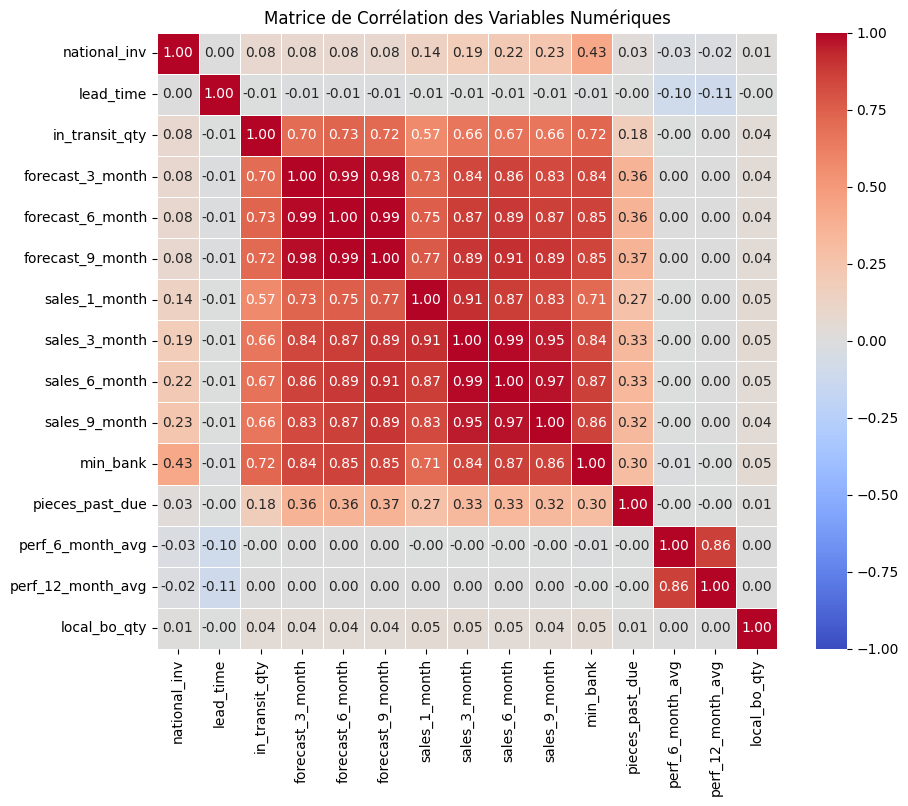

🔴 Forte corrélation détectée : forecast_3_month ↔ forecast_6_month
🔴 Forte corrélation détectée : forecast_3_month ↔ forecast_9_month
🔴 Forte corrélation détectée : forecast_6_month ↔ forecast_9_month
🔴 Forte corrélation détectée : forecast_9_month ↔ sales_6_month
🔴 Forte corrélation détectée : sales_1_month ↔ sales_3_month
🔴 Forte corrélation détectée : sales_3_month ↔ sales_6_month
🔴 Forte corrélation détectée : sales_3_month ↔ sales_9_month
🔴 Forte corrélation détectée : sales_6_month ↔ sales_9_month
🟢 Association significative (Khi-2) : potential_issue ↔ deck_risk
🟢 Association significative (Khi-2) : potential_issue ↔ oe_constraint
🟢 Association significative (Khi-2) : potential_issue ↔ ppap_risk
🟢 Association significative (Khi-2) : potential_issue ↔ went_on_backorder
🟢 Association significative (Khi-2) : deck_risk ↔ ppap_risk
🟢 Association significative (Khi-2) : deck_risk ↔ stop_auto_buy
🟢 Association significative (Khi-2) : deck_risk ↔ rev_stop
🟢 Association significative (Khi

In [51]:
df_coor_train = correlation_analysis(df_clean_train)  # Appliquer l'analyse de corrélation

In [52]:
df_coor_train.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'sales_1_month', 'min_bank', 'potential_issue',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')

###### 2.1.2 Matrice de corrélation, dataset df_clean_test

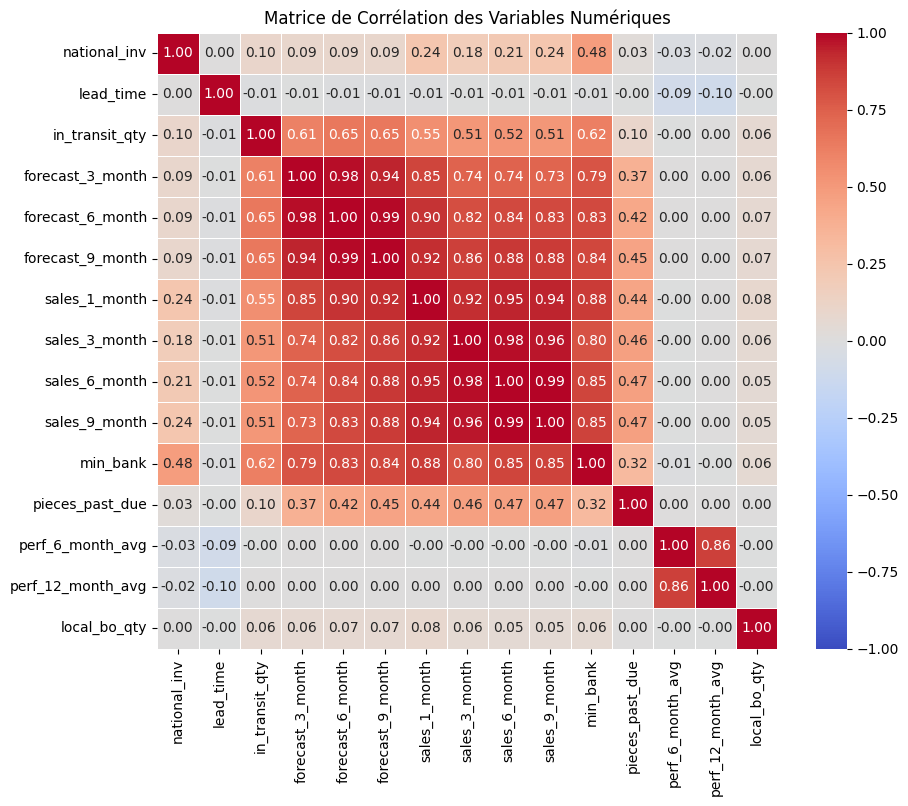

🔴 Forte corrélation détectée : forecast_3_month ↔ forecast_6_month
🔴 Forte corrélation détectée : forecast_3_month ↔ forecast_9_month
🔴 Forte corrélation détectée : forecast_6_month ↔ forecast_9_month
🔴 Forte corrélation détectée : forecast_9_month ↔ sales_1_month
🔴 Forte corrélation détectée : sales_1_month ↔ sales_3_month
🔴 Forte corrélation détectée : sales_1_month ↔ sales_6_month
🔴 Forte corrélation détectée : sales_1_month ↔ sales_9_month
🔴 Forte corrélation détectée : sales_3_month ↔ sales_6_month
🔴 Forte corrélation détectée : sales_3_month ↔ sales_9_month
🔴 Forte corrélation détectée : sales_6_month ↔ sales_9_month
🟢 Association significative (Khi-2) : potential_issue ↔ deck_risk
🟢 Association significative (Khi-2) : potential_issue ↔ oe_constraint
🟢 Association significative (Khi-2) : deck_risk ↔ ppap_risk
🟢 Association significative (Khi-2) : deck_risk ↔ stop_auto_buy
🟢 Association significative (Khi-2) : deck_risk ↔ went_on_backorder
🟢 Association significative (Khi-2) : oe_

In [53]:
df_coor_test = correlation_analysis(df_clean_test)  # Appliquer l'analyse de corrélation

In [54]:
df_coor_train.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'sales_1_month', 'min_bank', 'potential_issue',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')

##### 2.3 Réduction de la dimensionnalité par ACP , threshold = 0.9

In [55]:
def apply_pca(df, variance_threshold=0.90, exclude_cols=None):
    """
    Applique le PCA pour réduire la dimensionnalité tout en conservant le maximum d'information.

    Parameters:
        df (pd.DataFrame): Le dataset à traiter.
        variance_threshold (float): Pourcentage de variance minimale à conserver (90% par défaut).
        exclude_cols (list): Liste des colonnes à exclure de l'analyse PCA (par défaut, exclut 'sku' et 'potential_issue').

    Returns:
        pd.DataFrame: Le dataset transformé après PCA avec les colonnes originales ajoutées.
        PCA: L'objet PCA pour analyse.
    """

    if exclude_cols is None:
        exclude_cols = ['potential_issue']  # Colonnes à exclure par défaut

    # 1️⃣ Sélection des variables numériques uniquement
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols].dropna()  # Suppression des valeurs manquantes

    # 2️⃣ Exclusion des colonnes spécifiées
    df_numeric = df_numeric.drop(columns=exclude_cols, errors='ignore')  # Ignore les erreurs si les colonnes n'existent pas

    # 3️⃣ Standardisation des données
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_numeric)

    # 4️⃣ Application du PCA
    pca = PCA()
    pca.fit(df_scaled)

    # 5️⃣ Déterminer le nombre optimal de composantes
    variance_cumsum = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(variance_cumsum >= variance_threshold) + 1

    print(f"✅ Nombre optimal de composantes retenues : {n_components}")

    # 6️⃣ Ré-application du PCA avec le bon nombre de composantes
    pca = PCA(n_components=n_components)
    df_pca = pca.fit_transform(df_scaled)

    # 7️⃣ Visualisation de la variance expliquée
    plt.figure(figsize=(10,5))
    plt.plot(range(1, len(variance_cumsum) + 1), variance_cumsum, marker='o', linestyle='--', color='b')
    plt.axhline(y=variance_threshold, color='r', linestyle='-')
    plt.xlabel('Nombre de Composantes')
    plt.ylabel('Variance Cumulative')
    plt.title('Variance expliquée par les Composantes Principales')
    plt.show()

    # 8️⃣ Ajouter les colonnes exclues à la DataFrame finale
    df_final = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(n_components)])
    df_final[exclude_cols] = df[exclude_cols].reset_index(drop=True)

    return df_final, pca


###### 2.3.1 Calcul des composantes retenues , cas de df_cor_train

✅ Nombre optimal de composantes retenues : 6


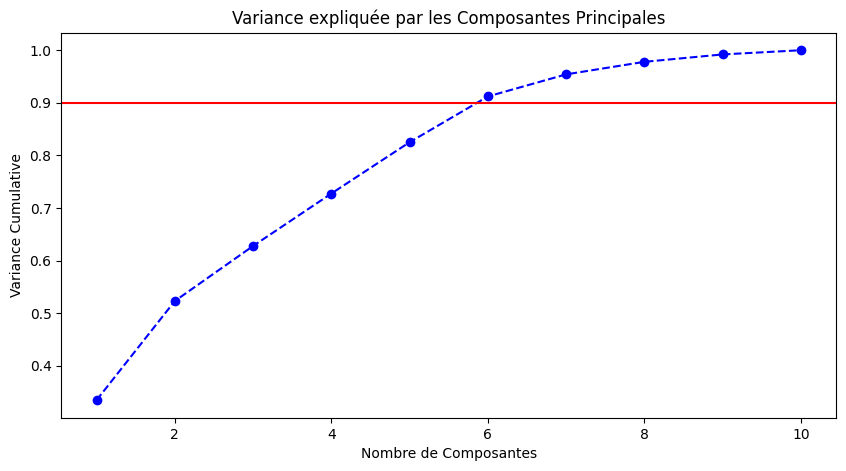

In [56]:
df_pca_train, pca_model_train  = apply_pca(df_coor_train)

In [57]:
df_pca_train

,PC1,PC2,PC3,PC4,PC5,PC6,potential_issue
0,-0.079274,0.173254,-0.005557,-0.021745,0.189684,0.003901,No
1,-0.077525,0.097161,-0.005872,-0.017371,0.033574,0.005680,No
2,-0.078330,0.180041,-0.002730,-0.018142,0.047261,0.006352,No
3,-0.073078,0.222222,0.012069,0.003635,-0.806998,0.020451,No
4,-0.078377,0.180053,-0.002995,-0.018119,0.047255,0.006275,No
...,...,...,...,...,...,...,...
1586962,0.092950,0.184908,-0.008397,0.009699,0.048719,-0.041761,No
1586963,-0.066573,0.300855,0.022319,0.151439,-0.789879,0.034057,No
1586964,-0.077356,0.157376,-0.004930,0.008105,0.187889,0.006305,No
1586965,-0.048457,0.157853,0.002943,0.156379,0.192138,0.013137,No


###### 2.3.2 Calcul des composantes retenues , cas de df_cor_test

✅ Nombre optimal de composantes retenues : 6


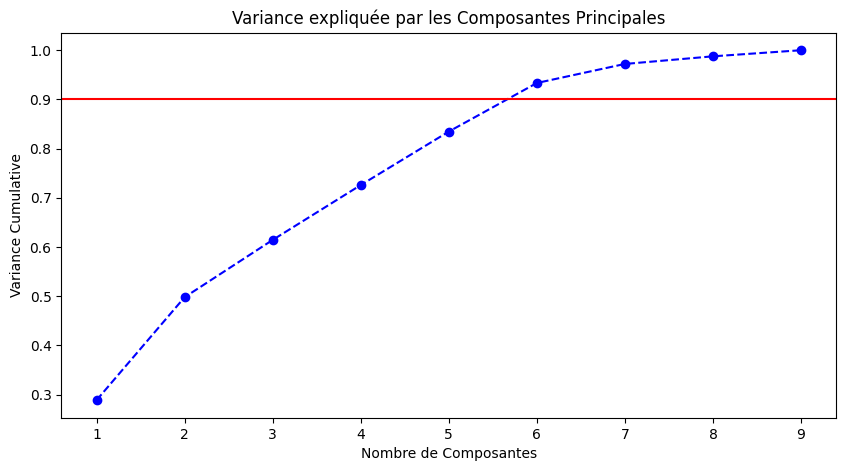

In [58]:
df_pca_test, pca_model_test = apply_pca(df_coor_test)

Cela signifie que 6 composantes principales suffisent pour expliquer 90% de la variance du dataset.

📌 Nouvelle Dimensionnalité du Dataset
Avant PCA : (1687861, 23)
Après PCA : (1687861, 6)
Tu es passé de 23 variables à 6 variables, tout en préservant 90% de l'information. 🚀
Cela réduit la complexité du modèle, améliore la rapidité d'entraînement, et diminue les risques de surapprentissage.


#### 3.Analyse de la distribution des données

##### 3.1 Distribution avant le smote

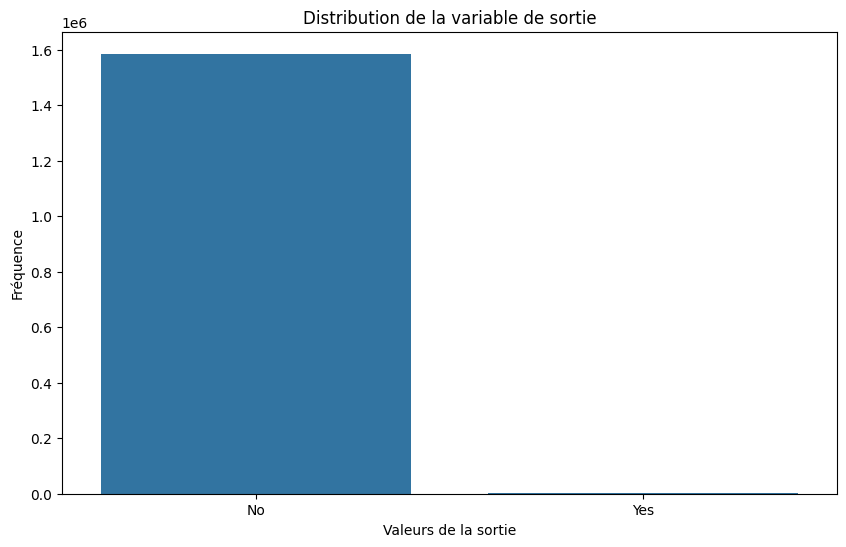

In [59]:
target_column = 'potential_issue'

X = df_pca_train.drop(columns=[target_column])
y = df_pca_train[target_column]

# Affichage de la distribution de la variable cible
plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title("Distribution de la variable de sortie")
plt.xlabel('Valeurs de la sortie')
plt.ylabel('Fréquence')
plt.show()


##### 3.2 Application du smote

In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=[f'PC{i+1}' for i in range(X_resampled.shape[1])])
df_resampled[target_column] = y_resampled


##### 3.3 Distribution aprés le smote

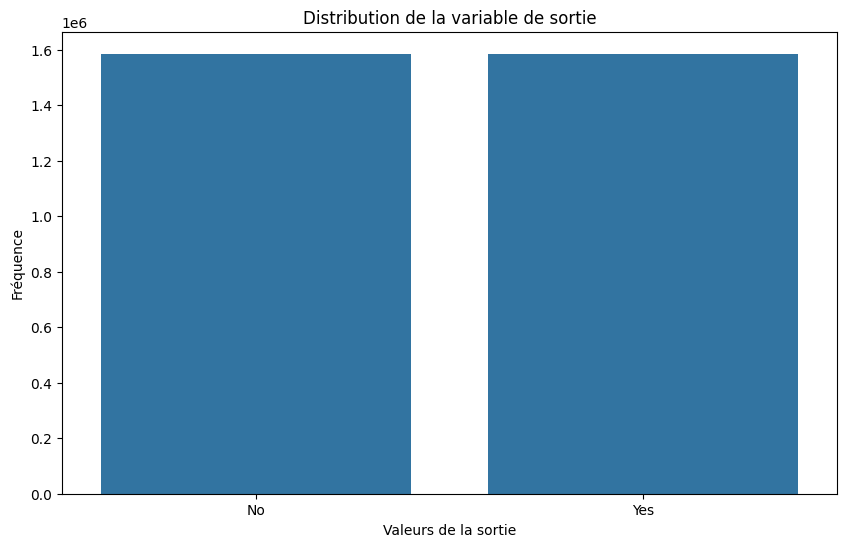

In [62]:
X = df_resampled.drop(columns=[target_column])
y = df_resampled[target_column]

# Affichage de la distribution de la variable cible
plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title("Distribution de la variable de sortie")
plt.xlabel('Valeurs de la sortie')
plt.ylabel('Fréquence')
plt.show()


#### 4.Fonction pour évaluer mon modèle

In [63]:
from sklearn.metrics import confusion_matrix, classification_report
def evaluer_modele(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()  # Extraire les valeurs de la matrice de confusion

    # Calcul des métriques
    Accur = (TP + TN) / (TP + TN + FP + FN)  # Exactitude
    Precis = TP / (TP + FP) if (TP + FP) != 0 else 0  # Précision
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0  # Taux de vrais positifs (Recall)
    TNR = TN / (TN + FP) if (TN + FP) != 0 else 0  # Taux de vrais négatifs
    FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  # Taux de faux négatifs
    Speci = TNR  # Spécificité (identique à TNR)
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # Taux de faux positifs
    F1 = 2 * (Precis * TPR) / (Precis + TPR) if (Precis + TPR) != 0 else 0  # Score F1

    # Affichage des résultats
    print(f"\n📌 Matrice de confusion :\n{cm}\n")
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
    plt.title("Matrice de Confusion")
    plt.show()

    print(f"✅ Exactitude (Accuracy) : {Accur:.4f}")
    print(f"✅ Précision (Precision) : {Precis:.4f}")
    print(f"✅ Taux de vrais positifs (TPR - Recall) : {TPR:.4f}")
    print(f"✅ Taux de vrais négatifs (TNR - Spécificité) : {TNR:.4f}")
    print(f"✅ Taux de faux négatifs (FNR) : {FNR:.4f}")
    print(f"✅ Score F1 : {F1:.4f}")
    print(f"✅ Spécificité (Speci) : {Speci:.4f}")
    print(f"✅ Taux de faux positifs (FPR) : {FPR:.4f}")
    print("\n" + "-" * 50 + "\n")


##### 4.1 Entrainement du modèle (Random Forest) après rééchantillonage

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### 🎯 Modèle avant rééchantillonnage

print("🟢 Évaluation APRÈS rééchantillonnage :")
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

🟢 Évaluation APRÈS rééchantillonnage :



📌 Matrice de confusion :
[[316012   1201]
 [    41 317172]]



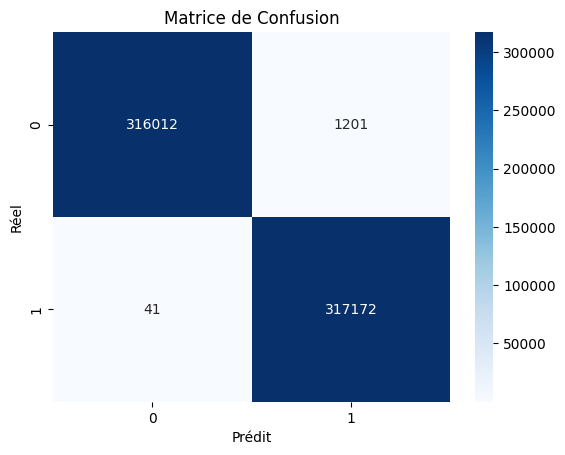

✅ Exactitude (Accuracy) : 0.9980
✅ Précision (Precision) : 0.9962
✅ Taux de vrais positifs (TPR - Recall) : 0.9999
✅ Taux de vrais négatifs (TNR - Spécificité) : 0.9962
✅ Taux de faux négatifs (FNR) : 0.0001
✅ Score F1 : 0.9980
✅ Spécificité (Speci) : 0.9962
✅ Taux de faux positifs (FPR) : 0.0038

--------------------------------------------------



In [65]:
evaluer_modele(y_test, y_pred)

##### 4.2 Entrainement du modèle (Random Forest) avant rééchantillonage

In [85]:
X_no_resampled = df_pca_train.drop(columns=[target_column])
y_no_resampled = df_pca_train[target_column]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_no_resampled, y_no_resampled, test_size=0.2, stratify=y, random_state=42)


In [87]:
### 🎯 Modèle avant rééchantillonnage
print("🔴 Évaluation AVANT rééchantillonnage :")
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

🔴 Évaluation AVANT rééchantillonnage :



📌 Matrice de confusion :
[[317193     21]
 [   171      9]]



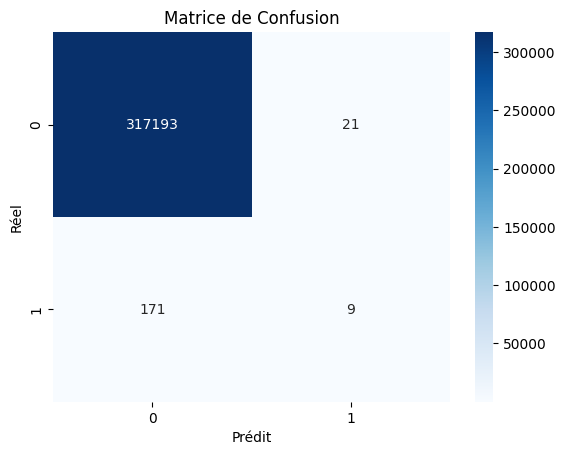

✅ Exactitude (Accuracy) : 0.9994
✅ Précision (Precision) : 0.3000
✅ Taux de vrais positifs (TPR - Recall) : 0.0500
✅ Taux de vrais négatifs (TNR - Spécificité) : 0.9999
✅ Taux de faux négatifs (FNR) : 0.9500
✅ Score F1 : 0.0857
✅ Spécificité (Speci) : 0.9999
✅ Taux de faux positifs (FPR) : 0.0001

--------------------------------------------------



In [88]:
evaluer_modele(y_test, y_pred)

# INTERPRETATION

## Évaluation des performances du modèle

### Cas 1 : Évaluation APRÈS rééchantillonnage

#### Résultats
Le modèle présente des performances remarquables :
- Détection précise des classes positives et négatives
- Haute précision et rappel
- Faible taux de faux positifs et faux négatifs

#### Interprétation
Le modèle démontre une excellente capacité de classification. La distinction entre les différentes classes est nette, avec un minimum d'erreurs de classification. Aucun problème majeur n'est identifié à ce stade.

### Cas 2 : Évaluation AVANT rééchantillonnage

#### Métriques de Performance
- **Exactitude (Accuracy)** : 99,94% (très élevée)
- **Précision (Precision)** : 30,00% (faible précision)
- **Rappel (TPR)** : 5,00% (très faible rappel)

#### Analyse Détaillée
Malgré une exactitude globalement élevée, le modèle présente des faiblesses significatives :
- Précision et rappel particulièrement bas pour les classes positives
- Fiabilité limitée pour certaines applications
- Bon taux de vrais négatifs, mais au détriment des vrais positifs

#### Problèmes Potentiels
Le modèle semble souffrir de :
- Un biais important vers la classe négative
- Un nombre conséquent de faux négatifs
- Des signes possibles de surapprentissage (overfitting) ou de sous-apprentissage

#### Implications
Le modèle ne généralise pas correctement, probablement en raison :
- D'une complexité excessive
- D'une structure trop simpliste
- D'un déséquilibre significatif dans les données d'entraînement

**Recommandation** : Un rééchantillonnage et un réglage fin du modèle sont nécessaires pour améliorer ses performances.
